# Áudio 1

In [1]:
# Importando funções
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Função auxiliar para plotagem de um vetor no domínio da frequência em dB
def spectrum(x_freq):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(x_freq)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

In [3]:
# Lendo o arquivo .wav para obter o sinal x[n] em forma de vetor

# Obtendo taxa de amostragem e vetor de audio 
taxa_amostragem, audio = read('01.wav')

n_amostras = len(audio)

# Colocando o eixo temporal a partir das amostras
# eixo_t = np.zeros(n_amostras); t_audio = 14
# t_amostra = t_audio/n_amostras # Tempo de cada amostra

# for am in range(1, n_amostras):
#     eixo_t[am] = eixo_t[am - 1] + t_amostra

eixo_t = np.linspace(0, len(audio)/taxa_amostragem, num=len(audio))

# Tocando o áudio com ruído
play(audio, rate=taxa_amostragem)

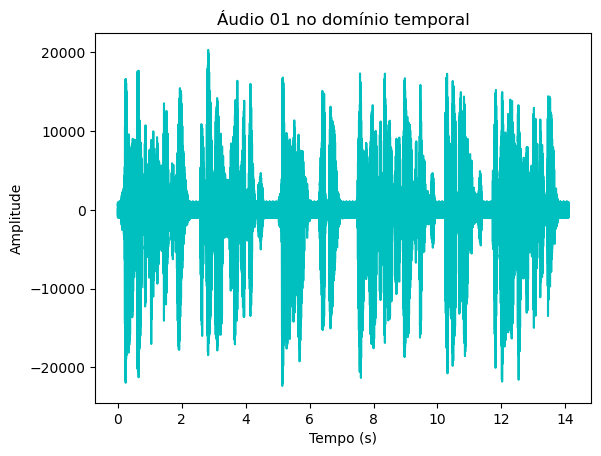

In [4]:
# Plotando o áudio no domínio temporal
plt.plot(eixo_t, audio, color='c')
plt.title('Áudio 01 no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# Aplicando a transformada de Fourier para observar o sinal na frequência
audio_freq = fftshift(fft(audio))
eixo_f = fftshift(fftfreq(n_amostras, d = 1/taxa_amostragem)) 

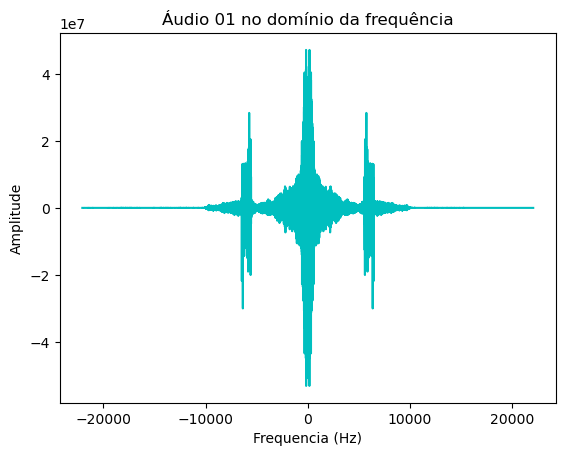

In [6]:
# Plotando o sinal no domínio da frequência
plt.plot(eixo_f, np.real(audio_freq), color='c')
plt.title("Áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")
plt.show()

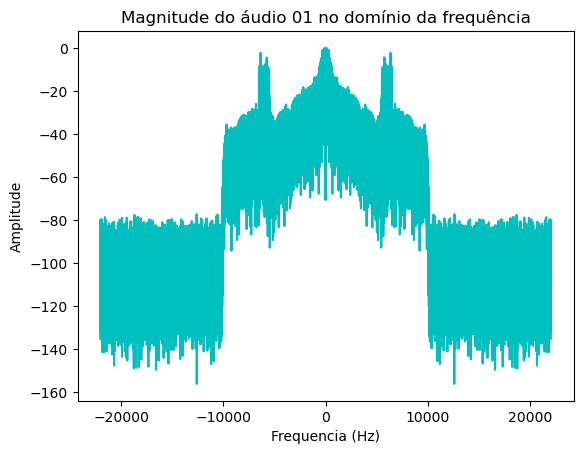

In [7]:
# Plotando a magnitude do sinal da frequência em escala logarítimica
plt.plot(eixo_f, spectrum(audio_freq), color='c')
plt.title("Magnitude do áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")
plt.show()

In [8]:
# Implementando a convolução entre o filtro e o sinal
def convolucao(filtro, sinal):

    n_amostras = sinal.size
    L = filtro.size
    resposta = np.zeros(n_amostras)
    
    for n in range(n_amostras):
        resposta[n] = 0
        for k in range(L-1):
            if (n - k) <= 0 or (n - k) >= n_amostras:
                resposta[n] += 0
            else:
                resposta[n] += (filtro[k]) * sinal[n - k]

    return resposta

In [9]:
def filtro_hamming(sinal, wc, L):

    n_amostras = sinal.size
    alpha = (L - 1)/2
    coeficientes = np.zeros(L)
    janela_func = np.zeros(L) 

    # Função sinc 
    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            coeficientes[i] = np.sin(wc*(i - alpha))/(np.pi*(i - alpha))
        else:
            coeficientes[i] = 0

    # Função janela
    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            janela_func[i] = 0.54 - 0.46*np.cos(2*np.pi*i)/(L - 1)
        else:
            janela_func[i] = 0

    return coeficientes * janela_func, coeficientes

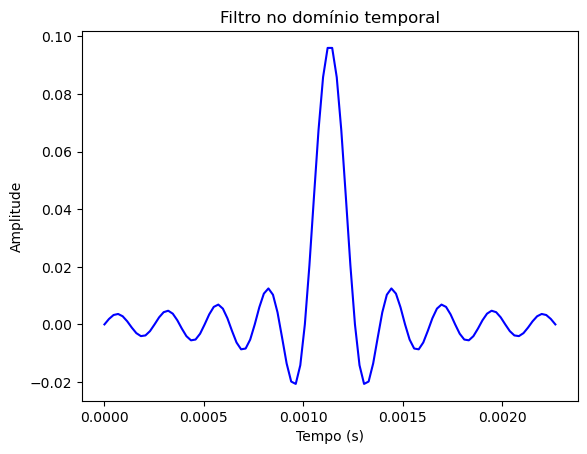

In [24]:
L = 100; wc = 2*np.pi/11

filtro_tempo, coeficientes = filtro_hamming(audio, wc, L)
eixo_t_filtro = np.linspace(0, len(filtro_tempo)/taxa_amostragem, num=len(filtro_tempo))

plt.plot(eixo_t_filtro, filtro_tempo, color='b')
plt.title('Filtro no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

In [25]:
# Aplicando a transformada de Fourier para observar o filtro na frequência
filtro_freq = fftshift(fft(filtro_tempo))
eixo_f_filtro = fftshift(fftfreq(L, d = 1/taxa_amostragem)) 

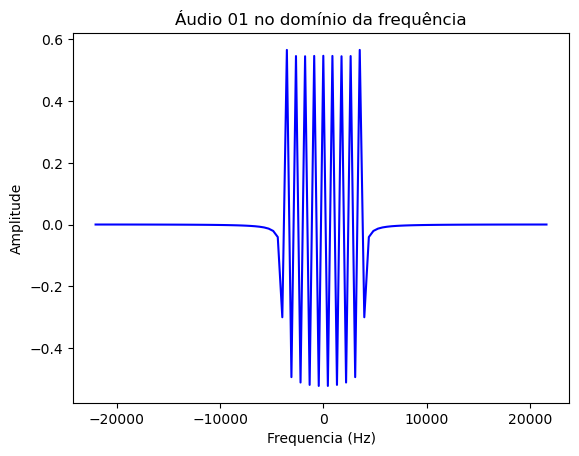

In [26]:
# Plotando o sinal no domínio da frequência
plt.plot(eixo_f_filtro, np.real(filtro_freq), color='b')
plt.title("Áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")
plt.show()

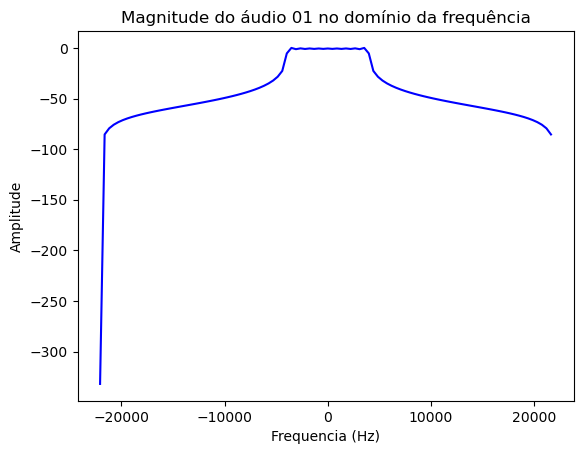

In [27]:
# Plotando a magnitude do sinal da frequência em escala logarítimica
plt.plot(eixo_f_filtro, spectrum(filtro_freq), color='b')
plt.title("Magnitude do áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")
plt.show()

In [14]:
audio_filtrado_hamming = convolucao(filtro_tempo, audio)

In [15]:
play(audio_filtrado_hamming, rate=taxa_amostragem)

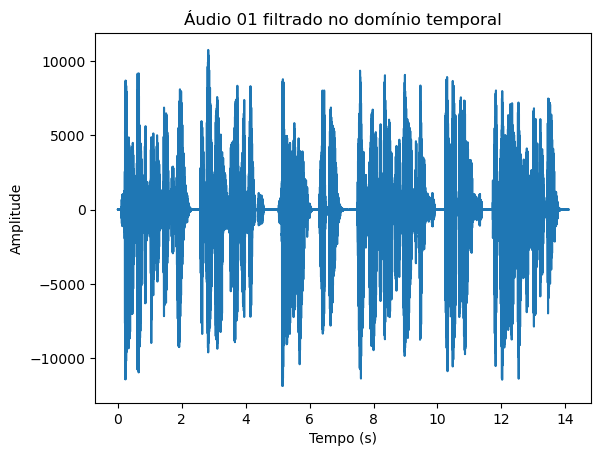

In [16]:
# Plot do sinal filtrado no domínio do tempo
plt.plot(eixo_t, audio_filtrado_hamming)
plt.title('Áudio 01 filtrado no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

In [17]:
# Aplicando a transformada de Fourier para observar o sinal filtrado na frequência
audio_filtrado_freq = fftshift(fft(audio_filtrado_hamming))

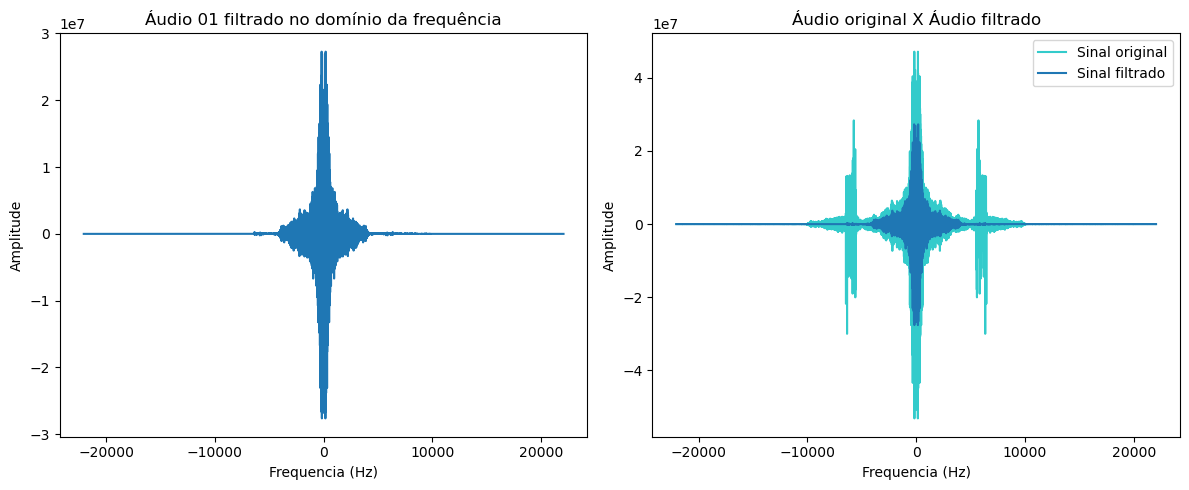

In [18]:
# Plotando o sinal filtrado no domínio da frequência

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(eixo_f, np.real(audio_filtrado_freq))
ax1.set_title("Áudio 01 filtrado no domínio da frequência")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequencia (Hz)")

ax2.plot(eixo_f, np.real(audio_freq), alpha=0.8, label='Sinal original', color='c')
ax2.plot(eixo_f, np.real(audio_filtrado_freq), label='Sinal filtrado')
ax2.set_title("Áudio original X Áudio filtrado")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequencia (Hz)")
ax2.legend()

plt.tight_layout()
plt.show()

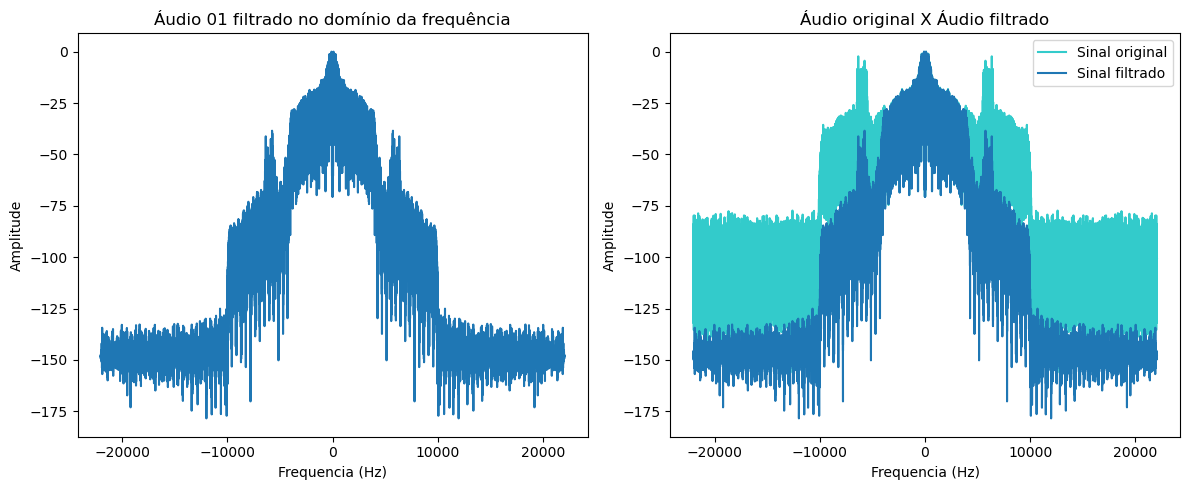

In [19]:
# Plotando a magnitude do sinal filtrado da frequência em escala logarítimica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(eixo_f, spectrum(audio_filtrado_freq))
ax1.set_title("Áudio 01 filtrado no domínio da frequência")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequencia (Hz)")

ax2.plot(eixo_f, spectrum(audio_freq), alpha=0.8, label='Sinal original', color='c')
ax2.plot(eixo_f, spectrum(audio_filtrado_freq), label='Sinal filtrado')
ax2.set_title("Áudio original X Áudio filtrado")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequencia (Hz)")
ax2.legend()

plt.tight_layout()
plt.show()